# Exercises week 36

### Exercise 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

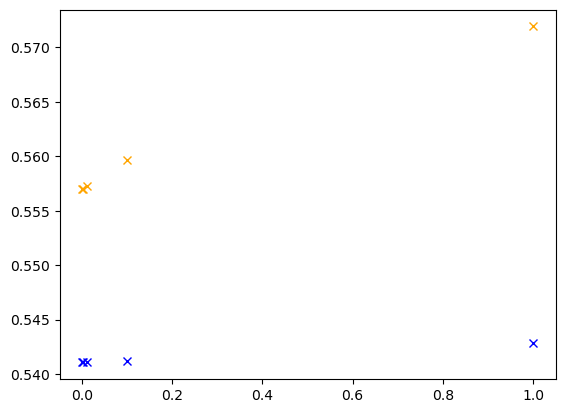

In [7]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

def prep(x, y, degree):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

    X_train = np.fliplr(np.vander(x_train.flatten(), degree+1))
    X_test = np.fliplr(np.vander(x_test.flatten(), degree+1))
    
    X_train = np.delete(X_train, 0, 1)
    X_test = np.delete(X_test, 0, 1)

    scaler = StandardScaler(with_std=False)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def OLS(X, y, degree):
    beta = np.linalg.inv(X.T@X)@X.T@y
    return X, beta

def RIDGE(X, y, l, degree):
    beta = np.linalg.inv(X.T@X+l*np.identity(len(X[0])))@X.T@y
    return X, beta

def reg(x,y,degree, lambd):
    x_train, x_test, y_train, y_test = prep(x,y,degree)
    mse_ols = []
    r2_ols = []
    mse_ridge = []
    r2_ridge = []

    X_ols, beta_ols = OLS(x_train, y_train, degree)
    y_fit_ols = x_train@beta_ols
    y_pred_ols = x_test@beta_ols
    mse_ols.append((mean_squared_error(y_train, y_fit_ols), mean_squared_error(y_test, y_pred_ols)))
    r2_ols.append((r2_score(y_train, y_fit_ols), r2_score(y_test, y_pred_ols)))

    for a in lambd:
        X_ridge, beta_ridge = RIDGE(x_train,y_train,a,degree)
    
        y_fit_ridge = x_train@beta_ridge
        y_pred_ridge = x_test@beta_ridge
        
        mse_ridge.append((mean_squared_error(y_train, y_fit_ridge), mean_squared_error(y_test, y_pred_ridge)))
        r2_ridge.append((r2_score(y_train, y_fit_ridge), r2_score(y_test, y_pred_ridge)))
    return (mse_ols, r2_ols, mse_ridge, r2_ridge)

lambdas = [0.0001, 0.001, 0.01, 0.1, 1]
deg10_mse_ols, deg10_r2_ols, deg10_mse_ridge, deg10_r2_ols = reg(x,y,10,lambdas)
deg15_mse_ols, deg15_r2_ols, deg15_mse_ridge, deg15_r2_ols = reg(x,y,15,lambdas)

# print(deg10_mse)
# print(deg15_mse)



y_plot1 = []
y_plot2 = []
for mse in deg10_mse_ridge:
    y_plot1.append(mse[0])
    y_plot2.append(mse[1])
plt.plot(lambdas, y_plot1, "x", color="blue", label="Training")
plt.plot(lambdas, y_plot2, "x", color="orange", label="Test")
